In [125]:
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.utils import to_categorical

## Dataset Loading

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
print("X Train Shape: ", x_train.shape)
print("Y Train Shape: ", y_train.shape)
print("X Test Shape: ", x_test.shape)
print("Y Test Shape: ", y_test.shape)

X Train Shape:  (60000, 28, 28)
Y Train Shape:  (60000,)
X Test Shape:  (10000, 28, 28)
Y Test Shape:  (10000,)


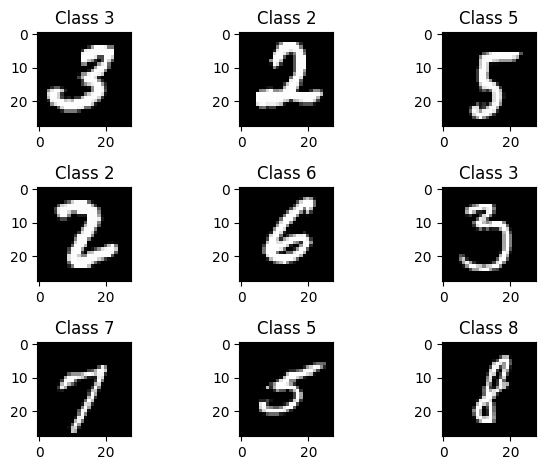

In [4]:
for i in range(9):
  plt.subplot(3,3, i+1)
  num = random.randint(0, len(x_train))
  plt.imshow(x_train[num], cmap='gray', interpolation='none')
  plt.title('Class {}'.format(y_train[num]))

plt.tight_layout()

In [5]:
unique_values, counts = np.unique(y_train, return_counts=True)

for value, count in zip(unique_values, counts):
  print(f"Value: {value}, Counts: {count}")

Value: 0, Counts: 5923
Value: 1, Counts: 6742
Value: 2, Counts: 5958
Value: 3, Counts: 6131
Value: 4, Counts: 5842
Value: 5, Counts: 5421
Value: 6, Counts: 5918
Value: 7, Counts: 6265
Value: 8, Counts: 5851
Value: 9, Counts: 5949


In [6]:
x_train.shape

(60000, 28, 28)

## Data Preprocessing

In [7]:
# Flatten the 28x28 images into a 1D array of 784 pixels

x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

In [8]:
x_train.shape

(60000, 784)

In [9]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [10]:
# Normalise the input data to the range [0, 1]

x_train = x_train / 255.0
x_test = x_test / 255.0

In [11]:
print("Training matrix shape: ", x_train.shape)
print("Testing matrix shape: ", x_test.shape)

Training matrix shape:  (60000, 784)
Testing matrix shape:  (10000, 784)


In [12]:
# One-hot encode labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Building deep neural network using TensorFlow

In [29]:
model = Sequential([
    layers.Input(shape=(784,)),
    layers.Dense(128),
    layers.BatchNormalization(),    # batchnormalization
    layers.LeakyReLU(alpha=0.01),
    layers.Dropout(0.2),             # drop out
    layers.Dense(64),
    layers.BatchNormalization(),      # batchnormalization
    layers.LeakyReLU(alpha=0.01),
    layers.Dropout(0.2),               # drop out
    layers.Dense(10, activation='softmax')
    ])

In [30]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_13 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_8 (LeakyReLU)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_9 (LeakyReLU)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 110,154 (430.29 KB)

 Trainable params: 109,770 (428.79 KB)

 Non-trainable params: 384 (1.50 KB)

In [31]:
# Compile the model

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [32]:
# model training

history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.1)

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.8124 - loss: 0.6507 - val_accuracy: 0.9633 - val_loss: 0.1301
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9388 - loss: 0.2044 - val_accuracy: 0.9728 - val_loss: 0.0934
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9522 - loss: 0.1576 - val_accuracy: 0.9785 - val_loss: 0.0755
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9595 - loss: 0.1314 - val_accuracy: 0.9798 - val_loss: 0.0710
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9645 - loss: 0.1164 - val_accuracy: 0.9800 - val_loss: 0.0706
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9679 - loss: 0.1041 - val_accuracy: 0.9812 - val_loss: 0.0668
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9680 - loss: 0.1039 - val_accuracy: 0.9803 - val_loss: 0.0682
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9711 - loss: 0.0877 - val_accuracy: 0

In [33]:
# Evaluate the model

loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Loss: {loss:.3f}")
print(f"Accuracy: {accuracy*100:.2f}%")

Loss: 0.068
Accuracy: 97.88%


**Key Note:**  
The loss value (0.068) reflects the model’s confidence in its predictions, while the accuracy (97.88%) indicates the percentages of correct predictions. Together, a low loss and high accuracy demonstrate strong model performance.

# Visualisation

### Training vs. Validation Accuracy and Training vs Validation Loss

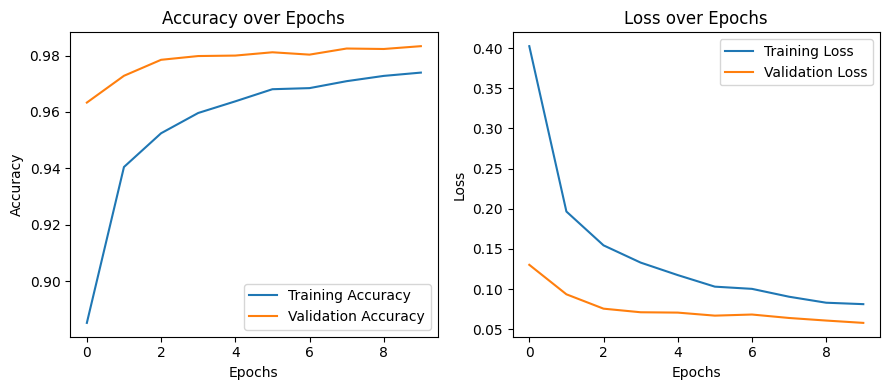

In [44]:
fig, ax = plt.subplots(1,2, figsize=(9,4))

ax[0].plot(history.history['accuracy'], label='Training Accuracy')
ax[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
ax[0].set_title('Accuracy over Epochs')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend()

ax[1].plot(history.history['loss'], label='Training Loss')
ax[1].plot(history.history['val_loss'], label='Validation Loss')
ax[1].set_title('Loss over Epochs')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend()

plt.tight_layout()
plt.show()

#Evaluation

In [79]:
y_pred = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [87]:
predictions = np.argmax(y_pred, axis=1)
y_actual = np.argmax(y_test, axis=1)

In [88]:
# Identify correctly and wrongly classified images

correct_indices = np.nonzero(predictions == y_actual)[0]
incorrect_indices = np.nonzero(predictions != y_actual)[0]

In [92]:
len(incorrect_indices)

212

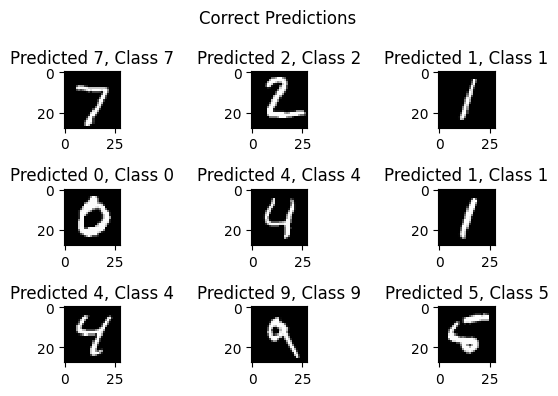

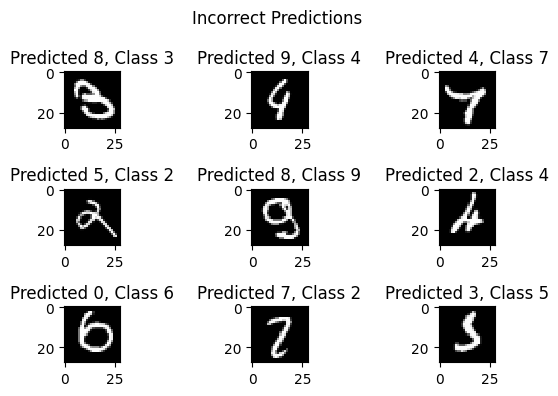

In [105]:
plt.figure(figsize=(6,4))
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predictions[correct], y_actual[correct]))
plt.suptitle("Correct Predictions")
plt.tight_layout()
plt.show()


plt.figure(figsize=(6,4))
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predictions[incorrect], y_actual[incorrect]))
plt.suptitle("Incorrect Predictions")
plt.tight_layout()
plt.show()

In [127]:
# Calculate accuracy score
accuracy = accuracy_score(y_actual, predictions)
print(f"Accuracy Score: {accuracy*100:.2f}")

# Calculate confusion matrix
conf_mat = confusion_matrix(y_actual, predictions)

print("Test Report: ")
print(classification_report(y_actual, predictions))

Accuracy Score: 97.88
Test Report: 
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.98      1032
           3       0.98      0.97      0.98      1010
           4       0.98      0.97      0.98       982
           5       0.98      0.97      0.97       892
           6       0.99      0.98      0.98       958
           7       0.97      0.98      0.97      1028
           8       0.97      0.97      0.97       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



**Key Note:**  
Test accuracy is 97.88% with macro/weighted F1 = 0.98, indicating strong and well-balanced performance. Digits 0–1 perform best (`~`0.99 F1), while 5, 8, and 9 are slightly lower (`~`0.97), reflecting a few look-alike confusions.

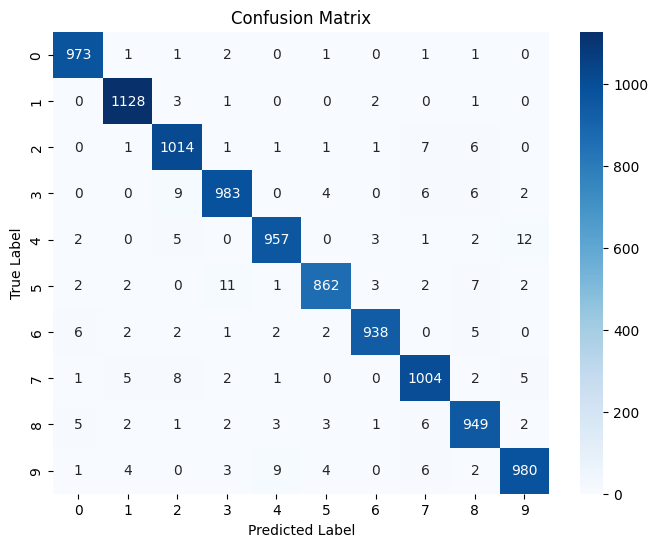

In [131]:
# Display confusion matrix using a heatmap

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

**Key Note:**  
The prominent diagonal indicates high accuracy across classes. Misclassifications are infrequent—mostly occasional confusions (e.g., 4 versus 9)—while class 5 shows comparatively lower recall, reflected by more off-diagonal entries.

**Bottom Line:**  
The model successfully classified handwritten digits with about 98% accuracy, showing strong precision and recall across all classes. Misclassifications were minimal and mostly between similar-looking digits, confirming that the model performs reliably on the MNIST dataset.